**Authors:**
- Mark Diamantino Caribé - BA3-INFO
- Rawad Ghostin - BA3-INFO

# Introduction 

Veisalgia, also commonly called “Hangover” is a medical condition for the disagreeable physical effects following excessive consumption of alcohol. Headache, drowsiness, fatigue, nausea are only some of the symptoms that could be caused. Given these points, it would be useful to study the average response that our body undertakes to counterbalance those physical effects and start a process of elimination of the alcohol.  
Within this context, we will study two models that have been developed in order to analyze the dynamics of this process: 
 - The model of Wagner 
 - The model of Norberg 

# Wagner model

The Wagner model has been developed by “JG Wagner” and “JA Patel” and published on “Research communications in chemical pathology and pharmacology”. 
The model of Wagner is defined as follows:


$$
V_d \frac{dC(t)}{dt} = - \frac{v_{max}C(t)}{k_m+C(t)}
$$

Where:
$$
V_d = r \cdot W  \\
$$
And
$$
r=0.3161-0.004821W+0.004362H \text{ for men} \\
r=0.3122-0.006446W+0.004466H \text{ for women} \\
$$

Where:
- $C$ represents alcohol concentration in blood [$\frac{mg}{L}$]
- $v_{max}$ represents the maximial elimination rate of alcohol $95.0 \pm 25.1$  [$\frac{mg}{min}$]
- $k_m$ is the constant Michaelis-Menten $27.0 \pm 18.9$ [$\frac{mg}{L}$].
- $V_d$ represents the theoric volume of water in the human body in which alcohol is distributed.
- $W$ represents the weight [$Kg$]
- $H$ the height [$cm$]
- $r$ Widmark factor
 

The equation models the alcohol blood concentration with a differential of the first order.

### Analysis
The differential equation can be solved with octave using the *symbolic* package as follows:

In [1]:
pkg load symbolic
syms x(t) vmax km Vd;
ode_sys = [diff(x(t),t) ==  -((vmax*x(t))/(km+x(t)))/Vd]
solutions = dsolve(ode_sys);
solutions


Symbolic pkg v2.8.0: Python communication link active, SymPy v1.4.
ode_sys = (sym)

  d           -vmax⋅x(t)   
  ──(x(t)) = ──────────────
  dt         Vd⋅(km + x(t))

solutions = (sym)

                    ⎛      t⋅vmax⎞
                    ⎜ C₁ - ──────⎟
                    ⎜        Vd  ⎟
                    ⎜ ───────────⎟
                    ⎜      km    ⎟
                    ⎜ℯ           ⎟
  x(t) = km⋅lambertw⎜────────────⎟
                    ⎝     km     ⎠



### Evaluation

We display the evolution of the alcohol concentration relatively to time, while varying the model parameters ($v_{max}$, $k_m$, $H$ and $W$).<br>

**Structure:**

 - Dimension : $n=1$, $m=0$ inputs, $p=1$ outputs.
 - Constraints on input: none
 - time: discrete
 - state space: continuous
 - formalism: ODE
 - The time interval is discrete with $t \in [0,10]$.
 
The octave function to plot the graph is defined below:

In [2]:
function wagner(delta_vmax, delta_km, sex, W, H, init_x, title_, annot)
  # delta_vmax +- 25.1 
  # delta_km +- 18.9
  # init_x 0-1000
  if (sex == 0) # men
    r = 0.3161-0.00482*W+0.004632*H;
  else # women
    r = 0.3122-0.006446*W+0.004466*H;
  endif
  t = [0,10]
  Vd = r*W;
  vmax = 95.0 + delta_vmax;
  km = 27.0 + delta_km;
  
  ode_sys = @(t,x)[ (-vmax*x(1))/(Vd*(km+x(1))) ];
  [t,x] = ode45(ode_sys, t, [init_x]);
  
  plot(t,x,"linewidth",5);
  text(10-0.2,x(length(x)), annot);
  xlabel("time (min)");
  ylabel("Alcohol concentration (mg/L)");
  title(title_);
endfunction

We compute the variation of alcohol concentration with various parameters and initial conditions in order to make sense of their role.
The weight and height values chosen are anchored around the average values of body-mass index.

<img src="bmi-chart_men.gif">


The blood alcohol concentration are chosen according to the standard BAC chart:
<img src="BAC.jpg">

t =

    0   10

t =

    0   10

t =

    0   10



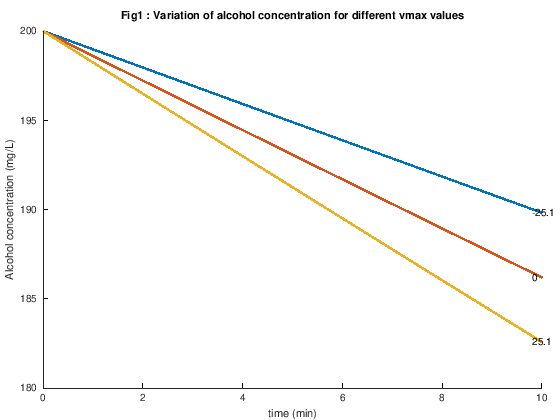

In [3]:
# varying vmax
# mildly alcoholic

hold on;
for delta = [-25.1,0,25.1]
    wagner(
      delta_vmax=delta,
      delta_km=+18.9,
      sex=0,
      W=70,
      H=176,
      init_x=200,
      title_="Fig1 : Variation of alcohol concentration for different vmax values",
      annot=num2str(delta)
     )
endfor
hold off;

As we can observe in Fig1, for men with the same size and $k_m$, with an inital alcohol concentration of $300 \frac{mg}{L}$, the rate of concentration decrease is greater for a greater $v_{max}$.<br>
Therefore, we suppose that the rate of concentration decrease is proportional to $v_{max}$.

t =

    0   10

t =

    0   10

t =

    0   10



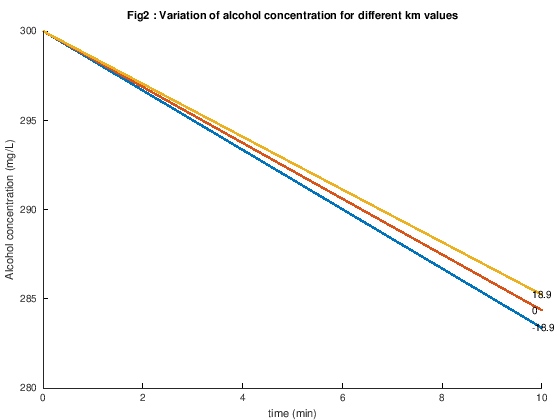

In [4]:
# varying km
# mildly alcoholic
hold on;
for delta = [-18.9,0,18.9]
    wagner(
      delta_vmax=0,
      delta_km=delta,
      sex=0,
      W=70,
      H=176,
      init_x=300,
      title_="Fig2 : Variation of alcohol concentration for different km values",
      annot=num2str(delta)
     )
endfor
hold off;

As we can observe in Fig2, for men with the same size and $v_{max}$, with an inital alcohol concentration of $300 \frac{mg}{L}$, the rate of concentration decrease is greater for a lower $k_m$.<br>
Therefore, we suppose that the rate of concentration decrease is invertly proportional to $v_{max}$.

t =

    0   10

t =

    0   10



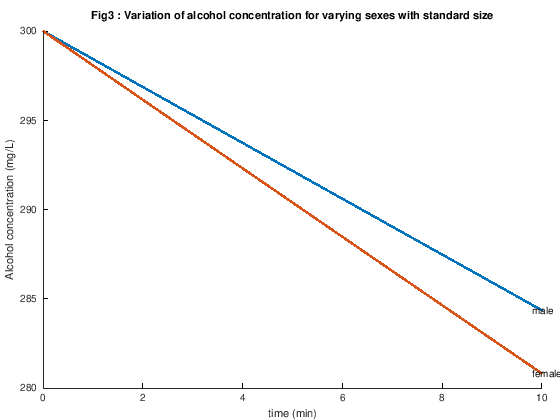

In [5]:
# varying sex
# mildly alcoholic
hold on;

# standard man
wagner(
  delta_vmax=0,
  delta_km=0,
  sex=0,
  W=70,
  H=176,
  init_x=300,
  title_="Fig3 : Alcohol concentration for varying sexes with standard size",
  annot="male"
 )

# standard size woman
wagner(
  delta_vmax=0,
  delta_km=0,
  sex=1,
  W=70,
  H=176,
  init_x=300,
  title_="Fig3 : Variation of alcohol concentration for varying sexes with standard size",
  annot="female"
 )
hold off;

As we can observe in Fig3, for 2 persons with the same size ,$k_m$ and $v_{max}$, the rate of concentration decrease is greater for the male person than the female person.<br>
Therefore, we suppose that the rate of concentration decrease is greater for men than women.
Additionally, we note that women have lower weight and height than men by the standards, which affects the rate of decrease as we will discuss in the following.

t =

    0   10

t =

    0   10

t =

    0   10

t =

    0   10

t =

    0   10



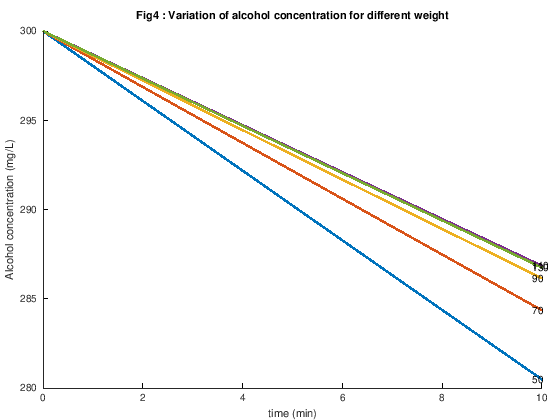

In [6]:
# varying weight - men
# mildly alcoholic
hold on;
for w = [50,70,90,110, 130]
    wagner(
      delta_vmax=0,
      delta_km=0,
      sex=0,
      W=w,
      H=176,
      init_x=300,
      title_="Fig4 : Variation of alcohol concentration for different weight",
      annot=num2str(w)
     )
endfor
hold off;

As we can observe in Fig4, for men with the same height, $v_{max}$ and $k_m$, with an inital alcohol concentration of $300 \frac{mg}{L}$, the rate of concentration decrease is greater for a lower weight.
However, we see that the rate is nearly the same for men of weight $110$ and $130 Kg$.
Therefore, we suppose that the rate of concentration decrease is greater for a lower weight up to a certain upper bound.

t =

    0   10

t =

    0   10

t =

    0   10

t =

    0   10

t =

    0   10

t =

    0   10

t =

    0   10



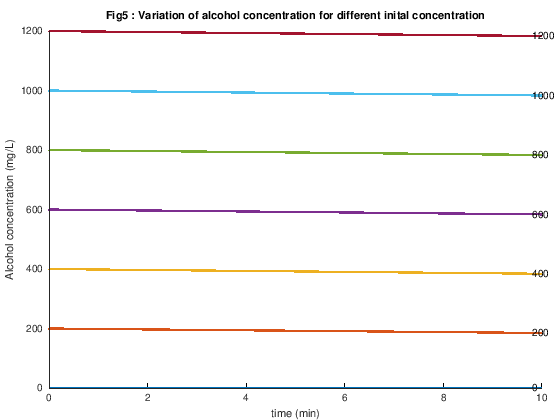

In [7]:
# varying initial alcohol concentration - men
hold on;
for c = [0:200:1200]
    wagner(
      delta_vmax=0,
      delta_km=0,
      sex=0,
      W=70,
      H=176,
      init_x=c,
      title_="Fig5 : Variation of alcohol concentration for different inital concentration",
      annot=num2str(c)
     )
endfor
hold off;

As we can observe in Fig5, for men with the same size, $v_{max}$ and $k_m$,, the rate of concentration decrease is identical for every inital alcohol concentration.<br>
Therefore, we suppose that the rate of concentration is independent of the initial alcohol concentration.

# Norberg model

The Norberg model has been developed by Ake Norberg in 2002. 
Unlike the Wagner model, this models takes in consideration multipe alcohol compartment in the body, thus might be more accurate.

## Norberg simplified model

A simplified version of the Norberg exists. We will be studying both versions in order to be able to compare them.

The Simplified model of Nordberg is defined as follows:
\begin{cases}
    V_{c1} \frac{dC_1(t)}{dt} = (-L_d-L_u) \cdot C_1(t)+L_d \cdot C_2(t)\\
    V_{c2} \frac{dC_2(t)}{dt} = L_d \cdot C_1(t)-L_d \cdot C_2(t)\\
\end{cases} 

Where:
 - $V_{C1} = 14.5 \pm 4.3$: Volume of the central compartment
 - $V_{C2} = 21.2 \pm 4.4$: Volume of the peripheral compartment
 - $C_1$: Concentration in the central compartment $[l]$ (plasma and tissues that are in rapid equilibrium, where the alchol clearance starts).
 - $C_2$: Concentration in the peripheral compartment $[l]$ (the rest of the body fluids in other tissues)
 - $L_u = 3.65 \pm 2.04$: Elimination constant [$\frac{mg}{L}$]
 - $L_d = 809 \pm 232 $: Parameter of districution between compartments [$\frac{mg}{L}$]

The equation models the alcohol blood concentration with a differential of the second order.

### Analysis
The differential equation can be solved with octave using the *symbolic* package as follows:

In [8]:
pkg load symbolic
Ld=809;
Lu=3.65;
Vc1=14.5;
Vc2=21.2;

syms x1(t) x2(t); # Ld Lu Vc1 Vc2;
ode_sys = [diff(x1(t),t) == (-Ld-Lu)*x1(t)/Vc1 + Ld*x2(t)/Vc1;  diff(x2(t),t) == Ld*x1(t)/Vc2 - Ld*x2(t)/Vc2]
solutions = dsolve(ode_sys);
solutions

    double_to_sym_heuristic at line 50 column 7
    sym at line 379 column 13
    mtimes at line 65 column 5
    double_to_sym_heuristic at line 50 column 7
    sym at line 379 column 13
    mrdivide at line 81 column 5
    double_to_sym_heuristic at line 50 column 7
    sym at line 379 column 13
    mrdivide at line 81 column 5
    double_to_sym_heuristic at line 50 column 7
    sym at line 379 column 13
    mrdivide at line 81 column 5
    double_to_sym_heuristic at line 50 column 7
    sym at line 379 column 13
    mrdivide at line 81 column 5
ode_sys = (sym 2×1 matrix)

  ⎡d             16253⋅x₁(t)   1618⋅x₂(t)⎤
  ⎢──(x₁(t)) = - ─────────── + ──────────⎥
  ⎢dt                290           29    ⎥
  ⎢                                      ⎥
  ⎢ d           4045⋅x₁(t)   4045⋅x₂(t)  ⎥
  ⎢ ──(x₂(t)) = ────────── - ──────────  ⎥
  ⎣ dt             106          106      ⎦

solutions = 
{
(sym)

                     ⎛  723967   √130464737966⎞              ⎛  723967   √130464
              

The system can be encoded with a matrix as well:

$$
A=
\begin{bmatrix}
\frac{-L_d-L_u}{V_{C1}} & \frac{L_d}{V_{C1}} \\
\frac{L_d}{V_{C2}} & \frac{-L_d}{V_{C2}}
\end{bmatrix}
$$

We can compute the eigenvalues and eigenvectors using octave as follow:

In [9]:
A = [(-Ld-Lu)/Vc1, Ld/Vc1; Ld/Vc2, -Ld/Vc2];
disp(A);
[V, L] = eig(A);
tr = trace(A)
d = det(A)
disp(L)

  -56.045   55.793
   38.160  -38.160
tr = -94.205
d =  9.6059
Diagonal Matrix

  -94.10313          0
          0   -0.10208


As we can observer we have 2 eigenvalues $\lambda_1=-94.1$ and $\lambda_2=-0.102$.
We have that:
 - $\lambda_{1,2} \in R $
 -  $\lambda_{1,2} < 0$
 
 
Therefore, we deduce that the there is a **stable node** in the system.<br>
Additionally, $\lambda_1 \cdot \lambda_2 \neq 0$, thus, the system is **simple**.
Notably, we have $tr(A)=-94.2<0$ and $det(A)=9.6>0$, hence, we have a **degenerated** stable node.

#### Eigen vectors
We will now find eigen vectors and their trajectory.

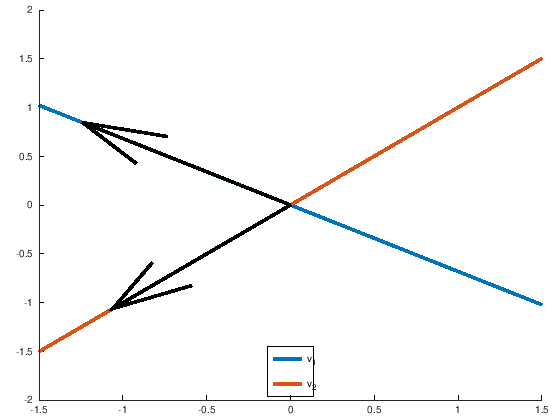

In [10]:
function [eigenline_1,eigenline_2,V] = get_eigenlines(A,line_range)
    [V,L] = eig(A);
    eigenline_1 = (V(2,1)/V(1,1)) * line_range;
    eigenline_2 = (V(2,2)/V(1,2)) * line_range;
endfunction

function [line_range,eigenline_1,eigenline_2] = plot_eigenlines(A)
    line_range = -1.5:.1:1.5;
    [eigenline_1,eigenline_2,V] = get_eigenlines(A,line_range);
    hold on;
    plot(line_range,eigenline_1,"linewidth",10);
    plot(line_range,eigenline_2,"linewidth",10);
    quiver([0;0],[0;0],V(1,:),V(2,:),1.5,"linewidth",10,"color","k");
    legend("v_1","v_2","location","south");
endfunction

[line_range,eigenline_1,eigenline_2] = plot_eigenlines(A);

#### Isoclines

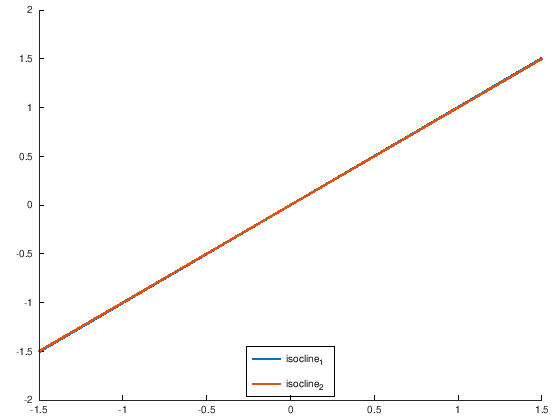

In [11]:
function [isocline_1,isocline_2] = get_isoclines(A,line_range)
    isocline_1 = -(A(1,1)/A(1,2)) * line_range;
    isocline_2 = -(A(2,1)/A(2,2)) * line_range;
endfunction

function [line_range,isocline_1,isocline_2] = plot_isoclines(A)
    line_range = -1.5:.1:1.5;
    [isocline_1,isocline_2] = get_isoclines(A,line_range);
    hold on;
    plot(line_range,isocline_1,"linewidth",5);
    plot(line_range,isocline_2,"linewidth",5);
    legend("isocline_1","isocline_2","location","south");
endfunction

[line_range,isocline_1,isocline_2] = plot_isoclines(A);

#### Phase portrait

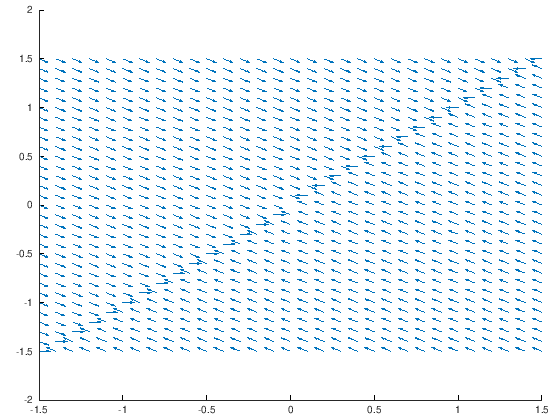

In [12]:
function [x1,x2,x1p,x2p] = plot_portrait_phase(A)
    #grid for plotting
    x1range=-1.5:.1:1.5;
    x2range=-1.5:.1:1.5;
    [x1,x2] = meshgrid(x1range, x2range);

    # Define the system to plot (based on matrix A)
    x1p = A(1,1)*x1+A(1,2)*x2;
    x2p = A(2,1)*x1+A(2,2)*x2;

    #Normalize values for plotting
    norms=sqrt(x1p.^2+x2p.^2);
    # Vector field plot
    hold on;
    quiver(x1,x2,x1p./norms,x2p./norms,0.5);
endfunction
[x1,x2,x1p,x2p] = plot_portrait_phase(A);

#### Phase portrait complete

ans =

 Columns 1 through 8:

  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.8000

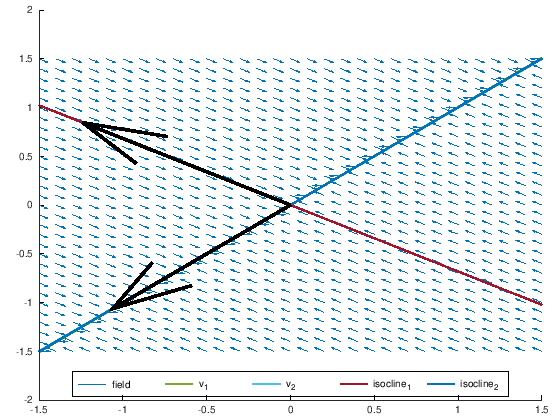

In [13]:
function [x1,x2,x1p,x2p] = plot_portrait_phase_complete(A)
    #grid for plotting
    x1range=-1.5:.1:1.5;
    x2range=-1.5:.1:1.5;
    [x1,x2] = meshgrid(x1range, x2range);

    # Define the system to plot (based on matrix A)
    x1p = A(1,1)*x1+A(1,2)*x2;
    x2p = A(2,1)*x1+A(2,2)*x2;

    #Normalize values for plotting
    norms=sqrt(x1p.^2+x2p.^2);
    
    [eigenline_1,eigenline_2,V] = get_eigenlines(A,x1range);
    [isocline_1,isocline_2] = get_isoclines(A,x1range);
    
    # Vector field plot
    hold on;
    quiver(x1,x2,x1p./norms,x2p./norms,0.5);
    # Isoclines
    plot(x1range,isocline_1,"linewidth",5);
    plot(x1range,isocline_2,"linewidth",5);
    # Vecteurs propres
    plot(x1range,eigenline_1,"linewidth",5);
    plot(x1range,eigenline_2,"linewidth",5);
        quiver([0;0],[0;0],V(1,:),V(2,:),1.5,"linewidth",10,"color","k");
    legend("v_1","v_2","location","south");
    legend("field","v_1","v_2","isocline_1","isocline_2","location","south","orientation", "horizontal");
endfunction

plot_portrait_phase_complete(A)

### Evaluation
As we have previously done wioth the Wagner model, we can now display the evolution of the alcohol concentration relatively to time, while varying the parameters $V_{C_1}$, $V_{C_2}$, $L_d$, $L_u$.<br>

**Structure:**

 - Dimension : $n=2$, $m=0$ inputs, $p=1$ outputs.
 - Constraints on input: none
 - Time: continuous
 - State space: continuous
 - Formalism: ODE
 - The time interval is discrete with $t \in [0,10]$.
 
The octave function to plot the graph is defined below:

In [14]:
function norberg_simple(x1_0, x2_0, delta_Vc1, delta_Vc2, delta_Ld, delta_Lu, title_, annot)
  # delta_Vc1 +- 4.3
  # delta_Vc2 +- 4.4
  # delta_Ld +- 232
  # delta Lu +- +-2.04
  Vc1 = 14.5 + delta_Vc1
  Vc2 = 21.2 + delta_Vc2
  Ld = 809 + delta_Ld
  Lu = 3.65 + delta_Lu
  
  A = [(-Ld-Lu)/Vc1, Ld/Vc1; Ld/Vc2, -Ld/Vc2];
  #[x1,x2,x1p,x2p] = plot_portrait_phase(A)
  ode_sys = @(t,x) [((-Ld-Lu)*x(1)+Ld*x(2))/Vc1; (Ld*x(1)+(-Ld)*x(2))/Vc2];
  [t,x] = ode23(ode_sys, [0,10], [x1_0,x2_0]);
  plot(t,x,"linewidth",5);
  text(10-0.2,x(length(x)), annot);
  xlabel("time (min)");
  ylabel("Alcohol concentration (mg/L)");
  title(title_);
endfunction

Vc1 =  10.200
Vc2 =  21.200
Ld =  809
Lu =  3.6500
---
Vc1 =  14.500
Vc2 =  21.200
Ld =  809
Lu =  3.6500
---
Vc1 =  18.800
Vc2 =  21.200
Ld =  809
Lu =  3.6500
---


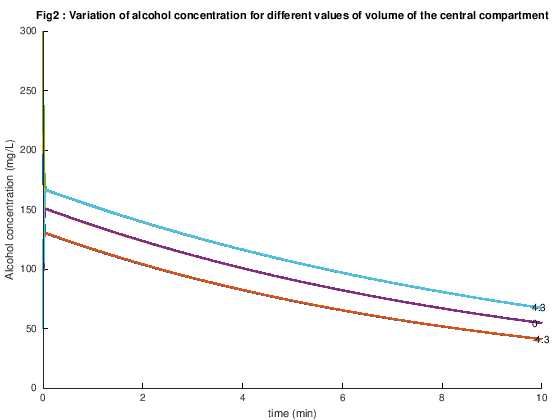

In [15]:
# varying Vc1
# Middly alcoholic
# Alcohol is mainly distributed in the central compartment
hold on;
for delta = [-4.3,0,4.3]
    norberg_simple(
      x1_0 = 300,
      x2_0 = 50,
      delta_Vc1=delta,
      delta_Vc2=0,
      delta_Ld=0,
      delta_Lu=0,
      title_="Fig2 : Variation of alcohol concentration for different values of volume of the central compartment",
      annot=num2str(delta)
     )
     disp("---");
endfor
hold off;

As we can observe in this figure, with an inital alcohol concentration of 300𝑚𝑔𝐿 in the central compartment and a little alchol concentration (50𝑚𝑔𝐿) in the peripheral comaprtment, the rate of concentration decrease is greater for a lower $V_{C_1}$.

Vc1 =  14.500
Vc2 =  16.800
Ld =  809
Lu =  3.6500
---
Vc1 =  14.500
Vc2 =  21.200
Ld =  809
Lu =  3.6500
---
Vc1 =  14.500
Vc2 =  25.600
Ld =  809
Lu =  3.6500
---


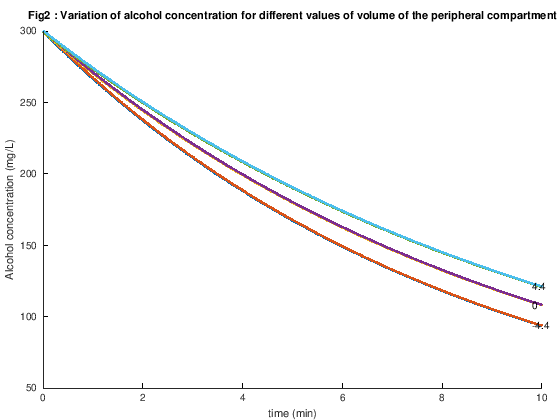

In [16]:
# varying Vc2
# Middly alcoholic 
# Alcohol equally distributed in the central compartment and the peripheral compartment
hold on;
for delta = [-4.4,0,4.4]
    norberg_simple(
      x1_0 = 300,
      x2_0 = 300,
      delta_Vc1=0,
      delta_Vc2=delta,
      delta_Ld=0,
      delta_Lu=0,
      title_="Fig2 : Variation of alcohol concentration for different values of volume of the peripheral compartment",
      annot=num2str(delta)
     )
     disp("---");
endfor
hold off;

As we can observe in this figure, alcohol concentration of 300𝑚𝑔𝐿 decreases faster if Volume of the peripheral compartment $V_{C_2}$ is lower.

Vc1 =  14.500
Vc2 =  21.200
Ld =  577
Lu =  3.6500
---
Vc1 =  14.500
Vc2 =  21.200
Ld =  809
Lu =  3.6500
---
Vc1 =  14.500
Vc2 =  21.200
Ld =  1041
Lu =  3.6500
---


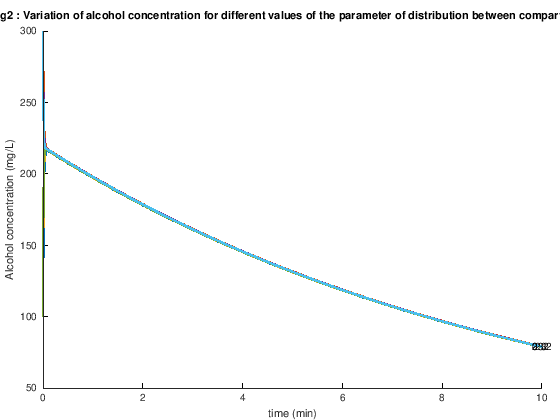

In [17]:
# varying L_d
# Middly alcoholic 
# Alcohol is mainly distributed in the peripheral compartment
hold on;
for delta = [-232,0,232]
    norberg_simple(
      x1_0 = 100,
      x2_0 = 300,
      delta_Vc1=0,
      delta_Vc2=0,
      delta_Ld=delta,
      delta_Lu=0,
      title_="Fig2 : Variation of alcohol concentration for different values of the parameter of distribution between compartments",
      annot=num2str(delta)
     )
     disp("---");
endfor
hold off;

We can notice that if the distribution between compartments varies, even if alcohol is mainly distributed in the peripheral compartment (or in the central compartment), then the global concentrationd ecreases equally for all values of $L_d$.

Vc1 =  14.500
Vc2 =  21.200
Ld =  809
Lu =  1.6100
---
Vc1 =  14.500
Vc2 =  21.200
Ld =  809
Lu =  3.6500
---
Vc1 =  14.500
Vc2 =  21.200
Ld =  809
Lu =  5.6900
---


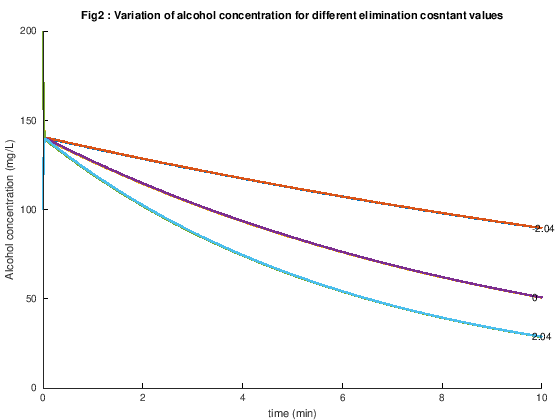

In [18]:
# varying Lu
hold on;
for delta = [-2.04,0,2.04]
    norberg_simple(
      x1_0 = 200,
      x2_0 = 100,
      delta_Vc1=0,
      delta_Vc2=0,
      delta_Ld=0,
      delta_Lu=delta,
      title_="Fig2 : Variation of alcohol concentration for different elimination cosntant values",
      annot=num2str(delta)
     )
     disp("---");
endfor
hold off;

We can observe that the decreasing rate is greater for a lower $L_u$.

## Norberg original
The following model of Nordberg is the original one:
\begin{cases}
    V_{c1} \frac{dC_1(t)}{dt} = -L\cdot C_1(t) - L_d\cdot C_1(t)+ L_d \cdot C_2(t) - L_u \cdot C_1(t)\\
    V_{c2} \frac{dC_2(t)}{dt} = L_d \cdot C_1(t)-L_d \cdot C_2(t)\\
\end{cases} 

where:
- $L =  \frac{v_{max}}{k_m + C_1(t)}$
- $v_{max}$ represents the maximial elimination rate of alcohol $95.0 \pm 25.1$  [$\frac{mg}{min}$]
- $k_m$ is the constant Michaelis-Menten $27.0 \pm 18.9$ [$\frac{mg}{L}$].

### Analysis
#### Calculation of the Jacobian matrix

In [19]:
pkg load symbolic
syms x1 x2 
Vc1 = 14.5 
Vc2 = 21.2
Km = 27
Ld = 809
Lu = 3.65
Vmax = 95
sys = [(1/Vc1)*(-(Vmax/(Km+x1))*x1 - Ld*x1 + Ld*x2 - Lu*x1); (1/Vc2)*(Ld*x1-Ld*x2)]
j = jacobian(sys)

Vc1 =  14.500
Vc2 =  21.200
Km =  27
Ld =  809
Lu =  3.6500
Vmax =  95
    double_to_sym_heuristic at line 50 column 7
    sym at line 379 column 13
    mtimes at line 65 column 5
    double_to_sym_heuristic at line 50 column 7
    sym at line 379 column 13
    mtimes at line 65 column 5
    double_to_sym_heuristic at line 50 column 7
    sym at line 379 column 13
    mtimes at line 65 column 5
sys = (sym 2×1 matrix)

  ⎡  16253⋅x₁      190⋅x₁      1618⋅x₂⎤
  ⎢- ──────── - ──────────── + ───────⎥
  ⎢    290      29⋅(x₁ + 27)      29  ⎥
  ⎢                                   ⎥
  ⎢         4045⋅x₁   4045⋅x₂         ⎥
  ⎢         ─────── - ───────         ⎥
  ⎣           106       106           ⎦

j = (sym 2×2 matrix)

  ⎡    190⋅x₁      16253       190        1618 ⎤
  ⎢───────────── - ───── - ────────────   ──── ⎥
  ⎢            2    290    29⋅(x₁ + 27)    29  ⎥
  ⎢29⋅(x₁ + 27)                                ⎥
  ⎢                                            ⎥
  ⎢                4045       

#### Calculations of stationary points
To do this, we cancel the derivatives:

\begin{cases}
    \dot{x_1} = \frac{-L\cdot x1(t)-L_d\cdot x1(t) + L_d\cdot x2(t) - L_u\cdot x1(t)}{V_{x1(t)}}= 0\\
    \dot{x_2} = \frac{L_d \cdot x1(t) - L_d\cdot x2(t)}{V_{x2(t)}}  = 0\\
\end{cases} 
##### Solutions:
This system has two possible solutions: $[-3871/73, -3871/73]$, $[0, 0]$.

#### Linearization around the stationary point $[-3871/73, -3871/73]$
We replace these x1 and x2 values in the Jacobian:

In [20]:
A = sub(j,{x1,x2}, {(-3871/73),(-3871/73)})
[V,L] = eig(A)
tr = trace(A)
d = det(A)

error: 'sub' undefined near line 1 column 5
V =

  -0.82611  -0.70616
   0.56351  -0.70805

L =

Diagonal Matrix

  -94.10313          0
          0   -0.10208

tr = -94.205
d =  9.6059


##### Interpretation

As we can observer we have 2 eigenvalues $\lambda_1=0$ (if rounded) and $\lambda_2=-38.16$.
We have that:
- $\lambda_{1,2} \in R $
- $\lambda_{1}$ has different sign from $\lambda_{2}$
 
 
Therefore, we deduce that the there is a **saddle** in the system.<br>
Additionally, $\lambda_1 \cdot \lambda_2 = 0$, thus, the system is **non simple**.
Hence, all states that belong to the right $a_{11}x_1 + a_{12}x_2 = $0 are equilibrium states.
Also, all trajectories are lines parallel to the right $v_2$. $0 = \lambda_1 > \lambda_2$ : this implies that all equilibrium states are stable.
#### Phase portrait

ans =

 Columns 1 through 8:

  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.8000

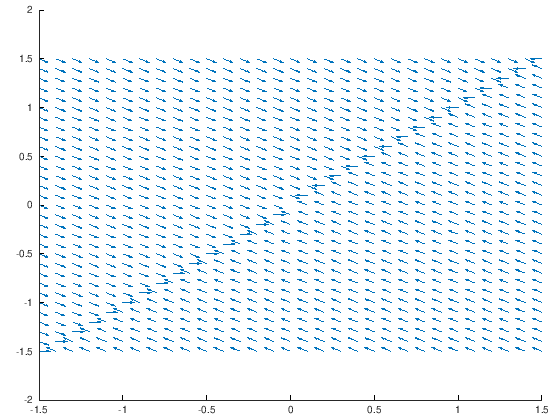

In [21]:
plot_portrait_phase(A,[-3871/73 -3871/73])

#### Linearization around the stationary point $[0, 0]$
We replace these x1 and x2 values in the Jacobian:

In [22]:
A = [- 16253/290 - 190/(29*27) 1618/29; 4045/106 -4045/106]
[V,L] = eig(A)
tr = trace(A)
d = det(A)

A =

  -56.287   55.793
   38.160  -38.160

V =

  -0.82678  -0.70524
   0.56252  -0.70896

L =

Diagonal Matrix

  -94.24769          0
          0   -0.20017

tr = -94.448
d =  18.866


##### Interpretation
As we can observer we have 2 eigenvalues $\lambda_1=-94.24$ and $\lambda_2=-0.20$.
We have that:
- $\lambda_{1,2} \in R $
- $\lambda_{1,2} < 0$
 
 
Therefore, we deduce that the there is a **stable node** in the system.<br>
Additionally, $\lambda_1 \cdot \lambda_2 \neq 0$, thus, the system is **simple**.
Notably, we have $tr(A)=-94.4<0$ and $det(A)=18.85>0$, hence, we have a **degenerated** stable node.

##### Isoclines
We can calculate the two isoclines solving the original model for x2 (and the derivatives = 0):
We find the two isoclines:
- x2 = (x1 (440731 + 16253 x1))/(16180 (27 + x1))
- x2 = x1


#### Phase portrait

ans =

 Columns 1 through 8:

  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.80000
  -1.50000  -1.40000  -1.30000  -1.20000  -1.10000  -1.00000  -0.90000  -0.8000

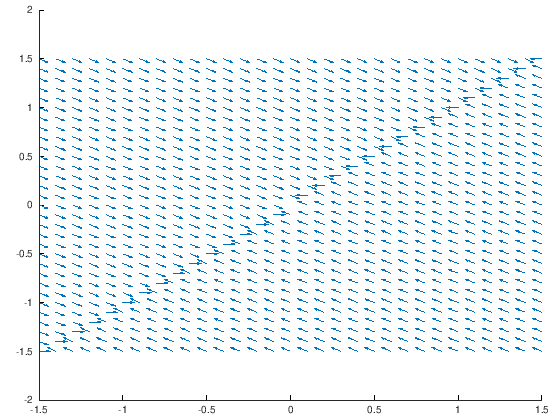

In [23]:
plot_portrait_phase(A,[0 0])

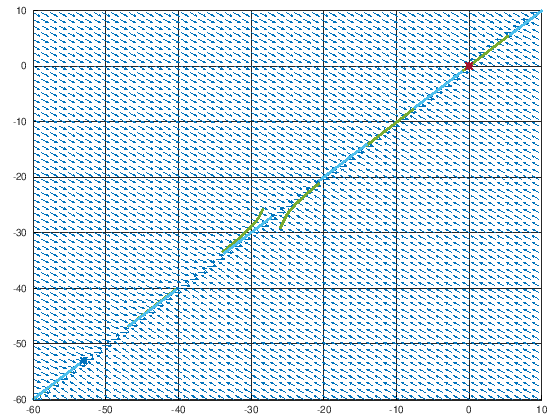

In [24]:
# Define grid for plotting
x1range=-60:1.2:10;
x2range=-60:1.2:10;
[x1,x2] = meshgrid(x1range, x2range);

# Define the system to plot (based on matrix A)
x1p = (1/Vc1)*(-(Vmax./(Km.+x1))*x1 - Ld*x1 + Ld*x2 - Lu*x1);
x2p = (1/Vc2)*(Ld*x1-Ld*x2);

#Normalize values for plotting
arrow=sqrt(x1p.^2+x2p.^2);

# Vector field plot
hold on;
quiver(x1,x2,x1p./arrow,x2p./arrow,0.7);

# Plot isocline
x1_red = -60:1:10;
plot(x1_red,(x1_red.*(440731 + 16253.*x1_red))./(16180 *(27 + x1_red)),"linewidth",6,"linestyle","--")
plot(x1_red,x1_red,"linewidth",6,"linestyle","--")


# Plot stationary points
plot(0,0, "*" ,"linewidth",4);
plot(-3871/73,-3871/73, "*" ,"linewidth",4);

grid on;
axis tight;

#### Differential equations solutions (for default parameters)
The differential equation can be solved with octave using the symbolic package as follows:

In [25]:
pkg load symbolic
syms x1 x2
Vc1 = 14.5 
Vc2 = 21.2
Km = 27
Ld = 809
Lu = 3.65
Vmax = 95
odesys = [(1/Vc1)*(-(Vmax/(Km+x1))*x1 - Ld*x1 + Ld*x2 - Lu*x1); (1/Vc2)*(Ld*x1-Ld*x2)]
solutions = dsolve(odesys);

Vc1 =  14.500
Vc2 =  21.200
Km =  27
Ld =  809
Lu =  3.6500
Vmax =  95
    double_to_sym_heuristic at line 50 column 7
    sym at line 379 column 13
    mtimes at line 65 column 5
    double_to_sym_heuristic at line 50 column 7
    sym at line 379 column 13
    mtimes at line 65 column 5
    double_to_sym_heuristic at line 50 column 7
    sym at line 379 column 13
    mtimes at line 65 column 5
odesys = (sym 2×1 matrix)

  ⎡  16253⋅x₁      190⋅x₁      1618⋅x₂⎤
  ⎢- ──────── - ──────────── + ───────⎥
  ⎢    290      29⋅(x₁ + 27)      29  ⎥
  ⎢                                   ⎥
  ⎢         4045⋅x₁   4045⋅x₂         ⎥
  ⎢         ─────── - ───────         ⎥
  ⎣           106       106           ⎦

error: Python exception: IndexError: list index out of range
    occurred at line 6 of the Python code block:
    sol = sp.dsolve(ode, ics=ics2)
error: called from
    python_cmd at line 178 column 7
    dsolve at line 187 column 8


### Evaluation
We can vary the parameters $L$, $V_{C_1}$, $V_{C_2}$, $L_d$, $L_u$ in order to display the evolution of the alcohol concentration relatively to time.

**Structure:**

 - Dimension : $n=2$, $m=0$ inputs, $p=1$ outputs.
 - Constraints on input: none
 - Time: continuous
 - State space: continuous
 - Formalism: ODE
 - The time interval is discrete with $t \in [0,10]$.
 
The octave function to plot the graph is defined below:

In [26]:
function norberg_complete(x1_0, x2_0, delta_Vc1, delta_Vc2, delta_Ld, delta_Lu, delta_Vmax, delta_km, title_, annot)
  # delta_vmax +- 25.1 
  # delta_km +- 18.9
  # delta_Vc1 +- 4.3
  # delta_Vc2 +- 4.4
  # delta_Ld +- 232
  # delta Lu +- +-2.04
  Vmax = 95.0 + delta_Vmax;
  Km = 27.0 + delta_km;
  Vc1 = 14.5 + delta_Vc1
  Vc2 = 21.2 + delta_Vc2
  Ld = 809 + delta_Ld
  Lu = 3.65 + delta_Lu
  
  ode_sys = @(t,x) odesys = [(1/Vc1)*(-(Vmax/(Km+x(1)))*x(1) - Ld*x(1) + Ld*x(2) - Lu*x(1)); (1/Vc2)*(Ld*x(1)-Ld*x(2))];
  [t,x] = ode23(ode_sys, [0,10], [x1_0,x2_0]);
  plot(t,x,"linewidth",5);
  text(10-0.2,x(length(x)), annot);
  xlabel("time (min)");
  ylabel("Alcohol concentration (mg/L)");
  title(title_);
endfunction

Vc1 =  14.500
Vc2 =  21.200
Ld =  809
Lu =  3.6500
---
Vc1 =  14.500
Vc2 =  21.200
Ld =  809
Lu =  3.6500
---
Vc1 =  14.500
Vc2 =  21.200
Ld =  809
Lu =  3.6500
---


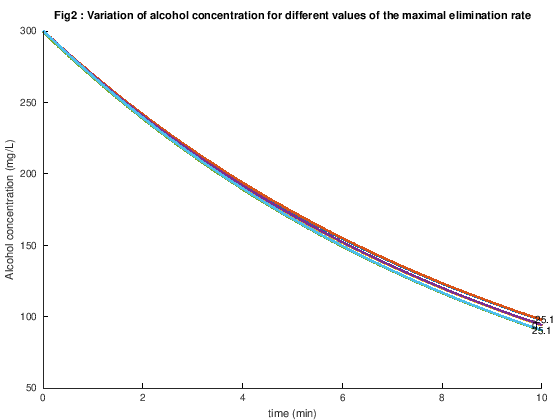

In [27]:
# varying Vmax
# Middly alcoholic 
# Alcohol is equally distributed in the peripheral compartment
hold on;
for delta = [-25.1,0,25.1]
    norberg_complete(
      x1_0 = 300,
      x2_0 = 300,
      delta_Vc1=0,
      delta_Vc2=0,
      delta_Ld=0,
      delta_Lu=0,
      delta_Vmax = delta,
      delta_km=0,
      title_="Fig2 : Variation of alcohol concentration for different values of the maximal elimination rate",
      annot=num2str(delta)
     )
     disp("---");
endfor
hold off;

##### Interpretation
As we can observe, the highest is the elimination rate, the faster the concentration of alcohol decreases.

Vc1 =  14.500
Vc2 =  21.200
Ld =  809
Lu =  3.6500
---
Vc1 =  14.500
Vc2 =  21.200
Ld =  809
Lu =  3.6500
---
Vc1 =  14.500
Vc2 =  21.200
Ld =  809
Lu =  3.6500
---


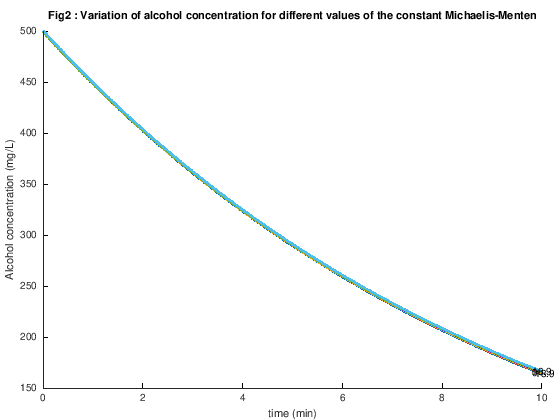

In [28]:
# varying Km
# Highly alcoholic 
# Alcohol is equally distributed in the peripheral compartment
hold on;
for delta = [-18.9,0,18.9]
    norberg_complete(
      x1_0 = 500,
      x2_0 = 500,
      delta_Vc1=0,
      delta_Vc2=0,
      delta_Ld=0,
      delta_Lu=0,
      delta_Vmax = 0,
      delta_km=delta,
      title_="Fig2 : Variation of alcohol concentration for different values of the constant Michaelis-Menten",
      annot=num2str(delta)
     )
     disp("---");
endfor
hold off;

##### Interpretation
The influence of the Michaelis-Menten constant is neglibeable.

Vc1 =  10.200
Vc2 =  21.200
Ld =  809
Lu =  3.6500
---
Vc1 =  14.500
Vc2 =  21.200
Ld =  809
Lu =  3.6500
---
Vc1 =  18.800
Vc2 =  21.200
Ld =  809
Lu =  3.6500
---


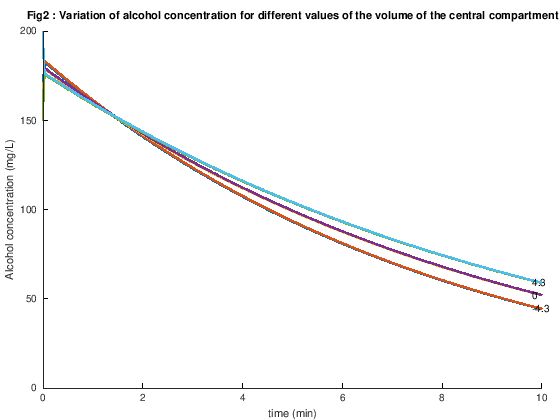

In [29]:
# varying Vc1
# Mid-low alcoholic 
# Alcohol is mainly distributed in the peripheral compartment
hold on;
for delta = [-4.3,0,4.3]
    norberg_complete(
      x1_0 = 150,
      x2_0 = 200,
      delta_Vc1=delta,
      delta_Vc2=0,
      delta_Ld=0,
      delta_Lu=0,
      delta_Vmax=0,
      delta_km=0,
      title_="Fig2 : Variation of alcohol concentration for different values of the volume of the central compartment",
      annot=num2str(delta)
     )
     disp("---");
endfor
hold off;

##### Interpretation
If the volume of the central compartment is higher, then alcohol needs more time to be eliminated.

Vc1 =  14.500
Vc2 =  16.800
Ld =  809
Lu =  3.6500
---
Vc1 =  14.500
Vc2 =  21.200
Ld =  809
Lu =  3.6500
---
Vc1 =  14.500
Vc2 =  25.600
Ld =  809
Lu =  3.6500
---


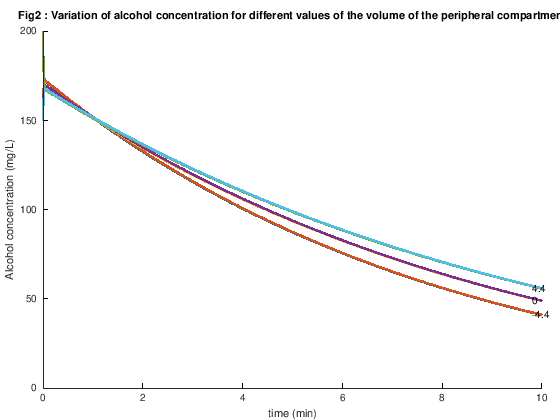

In [30]:
# varying Vc2
# Mid-low alcoholic
# Alcohol is mainly distributed in the central compartment
hold on;
for delta = [-4.4,0,4.4]
    norberg_complete(
      x1_0 = 200,
      x2_0 = 150,
      delta_Vc1=0,
      delta_Vc2=delta,
      delta_Ld=0,
      delta_Lu=0,
      delta_Vmax=0,
      delta_km=0,
      title_="Fig2 : Variation of alcohol concentration for different values of the volume of the peripheral compartment",
      annot=num2str(delta)
     )
     disp("---");
endfor
hold off;

##### Interpretation
As for the central compartment, if the volume  of the peripheral compartment is greater, then the model shows that more time is needed to eliminate the alcohol.

Vc1 =  14.500
Vc2 =  21.200
Ld =  809
Lu =  3.6500
---
Vc1 =  14.500
Vc2 =  21.200
Ld =  809
Lu =  3.6500
---
Vc1 =  14.500
Vc2 =  21.200
Ld =  809
Lu =  3.6500
---
Vc1 =  14.500
Vc2 =  21.200
Ld =  809
Lu =  3.6500
---


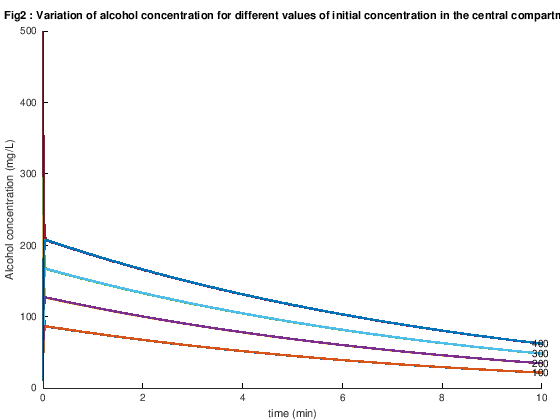

In [31]:
# varying x1_0
# Low to highly alcoholic
hold on;
for delta = [100, 200, 300, 400]
    norberg_complete(
      x1_0 = 100 + delta,
      x2_0 = 10,
      delta_Vc1=0,
      delta_Vc2=0,
      delta_Ld=0,
      delta_Lu=0,
      delta_Vmax=0,
      delta_km=0,
      title_="Fig2 : Variation of alcohol concentration for different values of initial concentration in the central compartment",
      annot=num2str(delta)
     )
     disp("---");
endfor
hold off;

##### Interpretation
As we can observe, if the concentration of alcohol is higher, we need more time to eliminate the alcohol (for the others standard values).